## Clustering
**Exploring the relationship between FRD and elevation performing clustering 
based on the K-means algorithm.**

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
crs = {'init': 'epsg:4326'}

from sklearn.cluster import KMeans

In [ ]:
#open csv file (with the filtered gdf)
df = pd.read_csv('/users/nikos/Desktop/potsdam/Big_data/Project_Big_Data/elevation_nan.csv')

df

,Unnamed: 0,Latitude,Longitude,VHRFC_LIS_FRD,geometry,elevation
0,25,-37.95,-143.25,11.821247,POINT (-143.25 -37.95),NaN
1,64,-37.95,-70.25,10.962107,POINT (-70.24999999999999 -37.95),1131.0
2,102,-37.95,-64.85,5.436871,POINT (-64.84999999999998 -37.95),240.0
3,104,-37.95,-64.65,5.594469,POINT (-64.64999999999998 -37.95),210.0
4,113,-37.95,-63.65,6.793575,POINT (-63.64999999999998 -37.95),166.0
...,...,...,...,...,...,...
500997,1515491,37.95,131.75,5.861458,POINT (131.7500000000001 37.95),0.0
500998,1515502,37.95,136.25,5.857105,POINT (136.2500000000001 37.95),0.0
500999,1515515,37.95,139.35,7.016274,POINT (139.35 37.95),11.0
501000,1515563,37.95,154.25,5.855022,POINT (154.2500000000001 37.95),NaN


In [ ]:
df.VHRFC_LIS_FRD.max()

232.52394

In [ ]:
gdf = gpd.GeoDataFrame(df, crs=crs, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))
del gdf['Unnamed: 0']
del df

In [ ]:
#add standarized parameters
gdf['VHRFC_LIS_FRD'] = (gdf.VHRFC_LIS_FRD - np.nanmean(gdf.VHRFC_LIS_FRD)) / np.nanstd(gdf.VHRFC_LIS_FRD)
gdf['elevation'] = (gdf.elevation - np.nanmean(gdf.elevation)) / np.nanstd(gdf.elevation)
gdf


,Latitude,Longitude,VHRFC_LIS_FRD,geometry,elevation
0,-37.95,-143.25,-0.285129,POINT (-143.25000 -37.95000),NaN
1,-37.95,-70.25,-0.361992,POINT (-70.25000 -37.95000),0.988919
2,-37.95,-64.85,-0.856307,POINT (-64.85000 -37.95000),-0.460965
3,-37.95,-64.65,-0.842207,POINT (-64.65000 -37.95000),-0.509782
4,-37.95,-63.65,-0.734930,POINT (-63.65000 -37.95000),-0.581382
...,...,...,...,...,...
500997,37.95,131.75,-0.818321,POINT (131.75000 37.95000),-0.851506
500998,37.95,136.25,-0.818711,POINT (136.25000 37.95000),-0.851506
500999,37.95,139.35,-0.715006,POINT (139.35000 37.95000),-0.833606
501000,37.95,154.25,-0.818897,POINT (154.25000 37.95000),NaN


In [ ]:
gdf_clean=gdf.dropna()
gdf_clean

,Latitude,Longitude,VHRFC_LIS_FRD,geometry,elevation
1,-37.95,-70.25,-0.361992,POINT (-70.25000 -37.95000),0.988919
2,-37.95,-64.85,-0.856307,POINT (-64.85000 -37.95000),-0.460965
3,-37.95,-64.65,-0.842207,POINT (-64.65000 -37.95000),-0.509782
4,-37.95,-63.65,-0.734930,POINT (-63.65000 -37.95000),-0.581382
5,-37.95,-63.35,-0.521427,POINT (-63.35000 -37.95000),-0.508155
...,...,...,...,...,...
500995,37.95,126.75,-0.767915,POINT (126.75000 37.95000),-0.677390
500996,37.95,127.65,-0.892159,POINT (127.65000 37.95000),-0.202231
500997,37.95,131.75,-0.818321,POINT (131.75000 37.95000),-0.851506
500998,37.95,136.25,-0.818711,POINT (136.25000 37.95000),-0.851506


In [ ]:
# K - means 

def cluster(n_clusters):
    n_init=100
    max_iter=1000
    global labels
    clf = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters,random_state=100, max_iter=max_iter)
    #labels1= clf.fit_predict(gdf[['VHRFC_LIS_FRD']])
    #dist1 = clf.fit(gdf[['VHRFC_LIS_FRD']]).inertia_
    labels = clf.fit_predict(gdf_clean[['VHRFC_LIS_FRD','elevation']])
    dist = clf.fit(gdf_clean[['VHRFC_LIS_FRD','elevation']]).inertia_
    
    return dist


In [ ]:
#RUN ONLY ONCE !!!

#create the distances list 
clusters_list = [3, 5, 7, 8, 10, 12, 15, 18, 20, 25]
distances = []
for i in clusters_list:
    distances.append(round(cluster(i),2))

#it takes a lot of time to run, so better save it:
with open("cluster_distances_elev_FRD.json", 'w') as f:
    json.dump(distances, f, indent=2) 
    

In [ ]:
#open the distances list
with open("cluster_distances_elev_FRD.json", 'r') as f:
    distances = json.load(f)

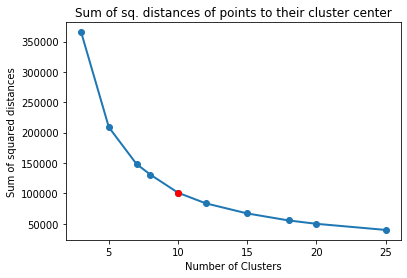

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.close('all')

plt.plot(clusters_list, distances, lw=2, ls='-', marker='o', markersize=6)
plt.plot(clusters_list[4], distances[4], 'ro', markersize=6) 
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared distances")
plt.title('Sum of sq. distances of points to their cluster center')



plt.savefig('Clusters - Squared Distances.png')
plt.show()

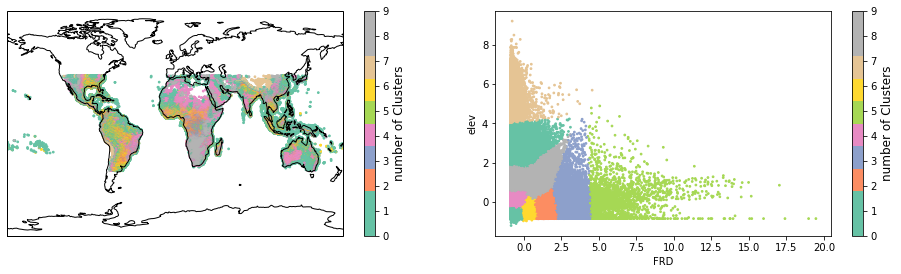

<Figure size 432x288 with 0 Axes>

In [ ]:
n_cluster = 10


plt.close('all')
f = plt.figure(figsize=(14,5))
    
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
ax.coastlines()
ax.axis('tight')
    
cluster(n_cluster)
img = ax.scatter(gdf_clean.geometry.x, gdf_clean.geometry.y, c=labels, s=3, cmap=plt.cm.get_cmap('Set2', n_cluster))
cb = plt.colorbar(img) 
cb.set_label('number of Clusters', fontsize=12)
#cb.ax.yaxis.set_ticks(range(n_cluster))
    
ax = f.add_subplot(122)
img = ax.scatter(gdf_clean.VHRFC_LIS_FRD, gdf_clean.elevation, c=labels, s=3, cmap=plt.cm.get_cmap('Set2', n_cluster))
ax.set_xlabel('FRD')
ax.set_ylabel('elev')
#ax.set_ylim([-5, 1])
cb = plt.colorbar(img) 
cb.set_label('number of Clusters', fontsize=12)
cb.ax.yaxis.set_ticks(range(n_cluster))
        
f.tight_layout(pad=5.0)   
    



plt.savefig('Map with Clusters.png') 
plt.show()